<a href="https://colab.research.google.com/github/Harris-giki/DigitClassificationNN_ML/blob/main/MNISTHandWrittenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Important Libraries

In [5]:
import numpy as np #for the numpy arrays
import matplotlib.pyplot as plt #ploting the graphs
import seaborn as sns #for plotting the graphs
import cv2 #openCV library for image processing
from google.colab.patches import cv2_imshow #for displaying the image
from PIL import Image #image processing library
import tensorflow as tf #deep learning library
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras.datasets import mnist#load mnist dataset
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets.

This keras dataset has already been processed meaning it is already resized to a common scale, and gray-scaled. Furthermore, it has also been splitted into the training and the testing sets.

#Loading and Analyzing the dataset

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Now analyzing the dataset more precisely.

In [8]:
type(X_train)

numpy.ndarray

In [9]:
#shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


X_train: Contains 60k images with each image having dimensions 28x28.
Y_train: Represents the labels onto which the X would map.

These images are grayscaled i.e 1 channel.

In [10]:
#printing the 10th image from the training data set to analyze our data set
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

The data of the image is stored in the form of a numpy array. Inorder to display the actual image, the code is given below.

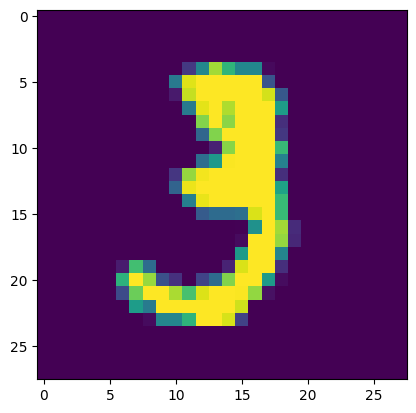

3


In [11]:
# displaying the  actual image

plt.imshow(X_train[10])
plt.show()

#here is will also print the corresponding label
print(Y_train[10])

Now analyzing for how many different labels we could make out predictions;

In [13]:
#unique values in Y test
print(np.unique(Y_train))
#unique values in Y test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Scaling the values to smaller values would enhance the accuracy of our prediction. It is a good practice for enhancing accuracy and has practically no issues in ML.

In [15]:
#scaling the values

X_train = X_train/255
X_test = X_test/255

#this approach will have the values now ranging from 0-1, as the rgb values are from 0-255
#which would eventually be divided with 255

#Building Neural Networks

CNN are very efficient for image recognition, but in this model we shall use the a basic neural network for make a predictive model.

In [16]:
 model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     #our dataset is in the form of a matrix/2D array rather in 1D array, that is why flattern is used
     #only dimension are passed to the flattern layer rn because our data is grayscaled, it would had been other wise for the colored images
     keras.layers.Dense(50, activation='relu'),
     #50 is the number of neurons in the layer, Relu: rectified linear unit, introduces non-linearity in the model to learn complex patterns
     #it works on the basic principal of passing the input directly to the output if its positive and other wise 0
     keras.layers.Dense(50, activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')
     # 10 means the number of classes/ neurons in the last layers from which the prediction occurs
 ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Compiling the Neural Network

In [18]:
model.compile(optimizer='adam',
              # Adam optimizer adjusts weights for efficient loss minimization
              loss='sparse_categorical_crossentropy',
              # Loss function for multi-class classification with integer labels
              metrics=['accuracy'])
              # Metric to evaluate the model's performance


#Training the Neural Network

In [20]:
model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9383 - loss: 0.2099
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9412 - loss: 0.1993
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9440 - loss: 0.1899
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9460 - loss: 0.1816
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9480 - loss: 0.1742
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9502 - loss: 0.1674
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9519 - loss: 0.1611
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9536 - loss: 0.1553
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9550 - loss: 0.1498
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9568 - loss: 0.1445
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9577 - loss: 0.1397
Epoch 12/15
1875/1875 ━━━━━━━━

In [23]:
#the model has been trained using the training data already, now it will be tested for its accuracy and loss on the test data
#calculating the accuracy on the test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9483 - loss: 0.1623
0.9549999833106995


Now storing the prediction made by our model using the X_test data set.

In [25]:
Y_pred= model.predict(X_test)
print(Y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


Predictions made for the 10000 images into 10 labels.

In [28]:
print(Y_pred[0])
#now at the 0th index of the X test array 7 digit image is stored, Y pred will give probability value
# for all the labels present to be mapped and we would have to set an appropiate threshold so
#our model can give a certain output when certain probability occurs

[1.39634544e-02 2.72402667e-06 5.45011103e-01 8.27102661e-01
 4.21397708e-05 2.49336392e-01 1.00145638e-11 9.99594510e-01
 1.03859425e-01 1.79419383e-01]


model.predict() gives the prediction probability of each output label (here ranginng from 0-9) for that particular data point.

In [29]:
#converting the prediction probabilites to class label

label_for_first_test_image = np.argmax(Y_pred[0]) #argmax tells us the index of the maximum value in the array
print(label_for_first_test_image)

7


Important point to remember:
Y_test ->True Labels
Y_pred ->Predicted Labels

In [30]:
#converting the prediction probabilites to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 5, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

#Building the Confusion Matrix

In [31]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 961    0    1    3    2    7    4    1    1    0]
 [   0 1113    3    3    0    0    2    2   12    0]
 [   7    1  973   15    6    2    5    7   15    1]
 [   1    0    8  963    2   14    0    8   13    1]
 [   1    0    5    0  956    0    5    2    2   11]
 [   6    2    3   21    3  827    9    0   14    7]
 [   7    3    1    1    5   11  928    0    2    0]
 [   2    7   15   16    4    0    0  959    2   23]
 [   3    3    2   13    7    7    4    3  929    3]
 [   5    4    1    9   30    6    0    5    8  941]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

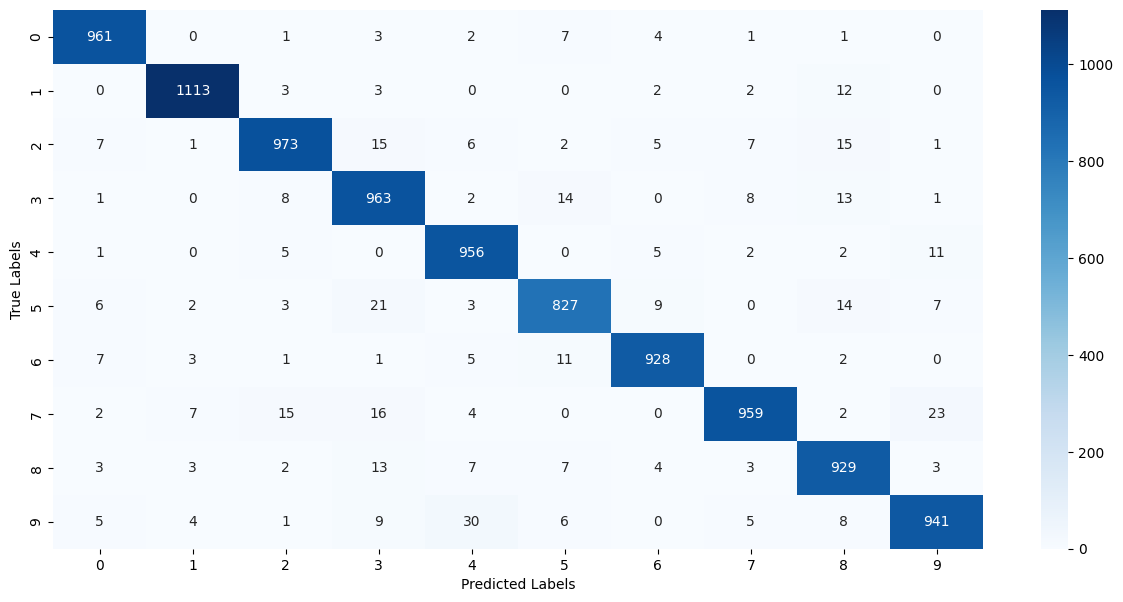

In [32]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')


#Building a Predictive Model

In [33]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path) #converts the input image into a numpy array

In [34]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


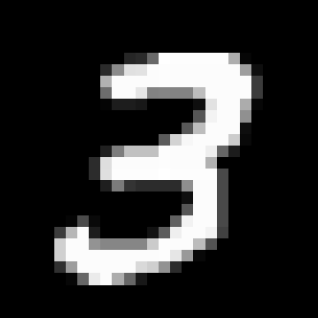

In [37]:
cv2_imshow(input_image)

In [38]:
input_image.shape

(318, 318, 3)

Now, we have to resize the image and change it from RGB to grayscale image.

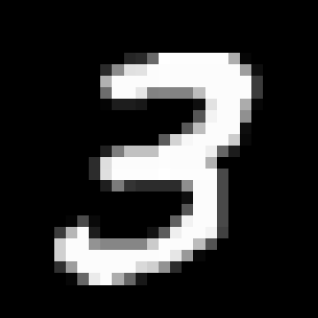

In [39]:
gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

In [40]:
gray.shape

(318, 318)

In [42]:
input_image_resize = cv2.resize(gray, (28,28))
input_image_resize.shape
cv2_imshow(input_image_resize)

In [47]:
#now scaling the resized gray image

input_image_resize = input_image_resize/255
type(input_image_resize)

numpy.ndarray

In [48]:
image_reshaped=np.reshape(input_image_resize, [1,28,28])

In [49]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1.2417852e-03 1.7034469e-04 5.3488158e-02 9.9997759e-01 1.2716418e-11
  6.2807985e-02 2.8909644e-11 1.4940647e-05 6.5909189e-01 3.3579633e-02]]


In [50]:
input_pred_label =np.argmax(input_prediction);
print(input_pred_label)

3
